# 4-1: Datasets

## Code.4-1-1: Dataset for Regression

In [1]:
import tensorflow as tf

N, n_feature = 8, 5   # y = w1x1 + w2x2 + ... + w5x5 + b
t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)  # dtype=tf.float32 이거 붙이는거 중요하다
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))  # 평균은 0 표준편차는 1 
# Y = t_weights*X 
# print(X.shape, '\n', X) # column 기준으로 1, 2, 3, 4, 5
# print(Y.shape, '\n', Y) # column 기준으로 *1, *2, *3, *4, *5 
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias # bias는 나온 값의 행을 기준으로 더하고 마지막에 bias를 더해야해서 axis=1로 계산한다.

print("X(shape/dtype/data): {} / {} \n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data): {} / {} \n{}\n".format(Y.shape, Y.dtype, Y.numpy()))  

X(shape/dtype/data): (8, 5) / <dtype: 'float32'> 
[[ 0.09587975  0.6908706  -0.91951746  0.8504223   0.8741551 ]
 [ 1.0487833   1.354375    0.6313995  -1.1695241  -0.28389293]
 [ 0.42957214 -0.3709377   0.6839887  -0.8819563   0.91877013]
 [ 0.06250443 -1.2254391  -0.07876258 -1.1599675  -1.267208  ]
 [ 1.1811817   1.6969979  -0.2309394   0.53345734  1.1642994 ]
 [-0.47514847 -1.0907115   0.22665188  0.49644232  2.0031893 ]
 [-1.2569114   0.37381506 -1.1032279   0.81862944  0.30171525]
 [ 0.70227325 -1.1916637   1.1390902  -0.25547627 -0.98510295]]

Y(shape/dtype/data): (8,) / <dtype: 'float32'> 
[16.491533   9.554171  12.805689  -3.6005716 21.837685  20.0251
 10.964129   5.7887964]



## Code.4-1-2: Dataset for Binary Classification

In [6]:
import tensorflow as tf

N, n_feature = 8, 5 
t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)  
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))  
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias
# cast -> data type을 변경
Y = tf.cast(Y > 5, tf.int32)

print("X(shape/dtype/data): {} / {} \n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data): {} / {} \n{}\n".format(Y.shape, Y.dtype, Y.numpy()))

X(shape/dtype/data): (8, 5) / <dtype: 'float32'> 
[[ 0.86312395 -0.23464535 -1.1065257   0.7447622  -0.860921  ]
 [ 0.56808776  0.47522318  2.2378366   0.5244908   1.9212565 ]
 [ 0.08449052 -0.26672956  0.68107957  0.4007136   1.114164  ]
 [-1.9980196  -0.3332967  -1.0844005   1.0630205  -1.7394203 ]
 [ 0.960387   -0.1182041   0.47852823  0.8629813   0.48449713]
 [ 1.8298794   0.39058068 -1.8452991   0.72767717 -0.4506285 ]
 [-0.5499646   1.5507076  -0.4887511   0.5865543   2.136187  ]
 [ 0.59517133  0.68082213  0.61976016 -0.6146485   0.9040753 ]]

Y(shape/dtype/data): (8,) / <dtype: 'int32'> 
[1 1 1 0 1 1 1 1]



## Code.4-1-3: Dataset for Multi-class Classification

(8, 2) (8, 1)
(16, 2) (16, 1)
(24, 2) (24, 1)
X(shape/dtype/data): (24, 2) / <dtype: 'float32'> 
[[-11.188539   -12.001735  ]
 [-11.32987    -13.407604  ]
 [-13.043126   -13.376975  ]
 [-12.137666   -14.010523  ]
 [-11.816714   -12.430252  ]
 [-10.9564905  -14.954446  ]
 [-10.592387   -13.858416  ]
 [-10.570622   -13.156772  ]
 [ -2.349048    12.543712  ]
 [ -3.0060782   14.405201  ]
 [ -3.0543854   13.107218  ]
 [ -4.379282    12.344653  ]
 [ -3.0971484   13.318901  ]
 [ -3.0099425   12.583959  ]
 [ -2.1578817   12.94817   ]
 [ -3.5897384   13.639534  ]
 [  5.930509    -2.6633034 ]
 [  6.6157045   -0.539037  ]
 [  3.8622394   -1.4901172 ]
 [  4.0355477   -3.4302237 ]
 [  4.4685316   -0.88701254]
 [  4.651469    -1.8931041 ]
 [  4.22856     -1.2572476 ]
 [  5.4088507   -2.947775  ]]

Y(shape/dtype/data): (24, 1) / <dtype: 'int32'> 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]



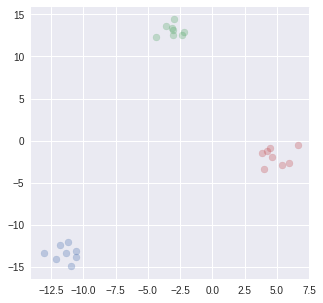

In [22]:
# 좌표평면에 각 사분면마다 클래스를 가지고 있는 데이터 셋 만들기
from numpy.core.fromnumeric import shape
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature = 8, 2
n_class = 3

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0,1), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2,)) # x, y, 좌표 생성

  x1 = center[0] + tf.random.normal(shape=(N, 1)) # x 축
  x2 = center[1] + tf.random.normal(shape=(N, 1)) # y 축

  #ax.scatter(x1.numpy(), x2.numpy())  # N * n_class 로 각 class당 150개가 찍힌다.  
  #지금은 N, n_class 숫자를 보기 편하게 바꿨음

  x = tf.concat((x1, x2), axis=1) # column 백터 2개가 있으니까 가로축으로 합치기?
  y = class_idx*tf.ones(shape=(N, 1), dtype=tf.int32)
  #print(x.shape, y.shape)

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0) # 세로축으로 해야 데이터들이 쌓임
  Y = tf.concat((Y, y), axis=0)
  print(X.shape, Y.shape)

print("X(shape/dtype/data): {} / {} \n{}\n".format(X.shape, X.dtype, X.numpy()))
# X는 x1, x2 가 쌓여서 24행 , x1, x2여서 2열
print("Y(shape/dtype/data): {} / {} \n{}\n".format(Y.shape, Y.dtype, Y.numpy()))
# Y는 x1, x2한게 1행,...,24행까지 

## Code.4-1-4: Dataset for Multi-class Classification with One-hot Encodeing

X(shape/dtype/data): (24, 2) / <dtype: 'float32'> 
[[  8.083615    -7.845377  ]
 [  9.115371    -8.200475  ]
 [  7.9803653   -9.397276  ]
 [  6.9108396   -9.156791  ]
 [  8.360142    -9.226593  ]
 [  8.487926    -8.782296  ]
 [  8.138044    -7.2804213 ]
 [  6.779541    -6.6357336 ]
 [  1.7085421    7.4263687 ]
 [  1.4398899    5.9324427 ]
 [  0.18887657   7.116335  ]
 [ -0.25244427   6.9766984 ]
 [  0.6851818    7.8234916 ]
 [  0.24242145   6.9004016 ]
 [  3.5144274    6.826173  ]
 [  0.7975382    5.545309  ]
 [-12.232886     0.70323306]
 [-11.808825     0.64002573]
 [ -9.962868     0.1854333 ]
 [-12.487479     1.5575762 ]
 [-12.650321     0.9112924 ]
 [ -9.828215     1.6005061 ]
 [-11.405019     1.0315201 ]
 [-11.256464     1.9089136 ]]

Y(shape/dtype/data): (24, 3) / <dtype: 'int32'> 
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 

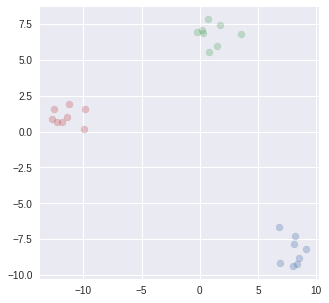

In [24]:
# one-hot-encoding
from numpy.core.fromnumeric import shape
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature = 8, 2
n_class = 3

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))

  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx*tf.ones(shape=(N, ), dtype=tf.int32)  # 위 zeros코드, 여기코드를 백터형식으로 바꿨음  -> 즉 일차배열 벡터형태로 만듦

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0) 
  Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)  # one-hot encoding
print("X(shape/dtype/data): {} / {} \n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data): {} / {} \n{}\n".format(Y.shape, Y.dtype, Y.numpy()))

## Code:4-1-5: Dataset Objects

In [25]:
import tensorflow as tf

N, n_feature = 100, 5 
batch_size = 32

t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)  
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))  
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias

"""
# 이렇게 하면 또 섞어주고 캐시를 만들고 하는 과정이 있어야함 
for batch_idx in range(N // batch_size):  #100에 32로 미니배치를 정해서 3번의 미니배치가 만들어진다.
  x = X[batch_idx * batch_size : (batch_idx + 1)*batch_size, ...]
  y = Y[batch_idx * batch_size : (batch_idx + 1)*batch_size, ...]

  print(x.shape, y.shape) #(32, 5) (32,)  (32, 5) (32,)  (32, 5) (32,)  3개 만들어진다 (미니배치가 3개만들어져서)
"""

dataset = tf.data.Dataset.from_tensor_slices((X, Y)) # tf.data.Dataset -> dataset을 만들어줌 but 사이즈가 작을때만 사용해야함. 사이즈 커지면 다른방법으로!!
dataset = dataset.batch(batch_size) # 뒤에 .shuffle(100) 같이 섞어줄수도있다. dataset = dataset.batch(batch_size).shuffle(100)

for x, y in dataset:
  print(x.shape, y.shape) 

#(4, 5) (4,)는 나머지값들

(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)
